<img src="setembro_amarelo.png">

<img src="setembro_amarelo.png">

<img src="setembro_amarelo.png">

# Setembro Amarelo: análise do suicídio no Brasil com Data Science


Todos os anos, mais de 12 mil pessoas tiram suas próprias vidas no Brasil. Em um cenário mundial, esse número ultrapassa 1 milhão de pessoas, levando o suicídio a ser considerado um problema de saúde pública.

Para você ter noção da dimensão desses números, saiba que o suicídio tem uma taxa maior do que vítimas de AIDS e da maioria dos tipos de câncer. Segundo a Organização Mundial da Saúde (OMS), o Brasil ocupa o oitavo lugar no número de suicídios no mundo: São 32 brasileiros por dia.


Setembro Amarelo é uma iniciativa da Associação Brasileira de Psiquiatria (ABP), em parceria com o Conselho Federal de Medicina (CFM), para divulgar e alertar a população sobre o problema.

Oficialmente, o Dia Mundial de Prevenção ao Suicídio ocorre no dia 10 de setembro, porém durante o mês inteiro são promovidos debates, campanhas e ações para a conscientização sobre o suicídio.

O que trago neste artigo é muito mais que apenas um artigo de Ciência de Dados. É uma pequena contribuição que visa ajudar a entender a extensão desse problema no Brasil, além de incentivar o Setembro Amarelo dentro da comunidade Python e Data Science.

# Descrição dos dados sobre suicídio

O melhor conjunto de dados que eu encontrei na internet está hospedado nesta página, e traz informações sobre vários países. O dataset contempla o período entre os anos de 1985 e 2016.

Esse dataset, na verdade, é um compilado de outros 4 datasets. A pessoa que disponibilizou o mesmo fez um grande trabalho de limpeza e padronização. Caso você deseje tenha interesse em conhecer as fontes que deram origem a este único arquivo, são elas:

    .United Nations Development Program. (2018). Human development index - HDI.
    .World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016.
    .Suicide in the Twenty-First Century (Szamil, 2017).
    .World Health Organization. (2018). Suicide prevention.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import matplotlib

%matplotlib inline

## Pegando os Dados 

In [2]:
dados=pd.read_csv("suicide_rates.csv")

## Vendo Algumas informações do nosso dataset

Vendo algumas informações do nosso dataset podemos ver que temos 27820 Linhas e 12 colunas

In [3]:
print(f"Linhas: {dados.shape[0]}\nColunas:{dados.shape[1]}")

Linhas: 27820
Colunas:12


## Vendo as 5 primeiras e ultimas Linhas

In [4]:
dados.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
dados.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


## Alterando Nome Das Colunas

In [6]:
dados.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
colunas={"country":"País","year":"Ano","sex":"Sexo","age":"Idades","suicides_no":"Numero_de_suicidio",
        "population":"Populacao","suicides/100k pop":"número-de-suicídios-por-100-mil-habitantes",
        "country-year":"País-Ano","HDI for year":"Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano",
        "gdp_for_year":"Produto-Interno-Bruto-(PIB)-para-o-ano","gdp_per_capita":"Produto-Interno-Bruto-(PIB)-per-capita",
        "generation":"Generation"}



In [8]:
dados.rename(columns=colunas,inplace=True)

In [9]:
dados.head()

,País,Ano,Sexo,Idades,Numero_de_suicidio,Populacao,número-de-suicídios-por-100-mil-habitantes,País-Ano,Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano,gdp_for_year ($),gdp_per_capita ($),Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Vendo todos os países que compoẽm este dataset

In [10]:
dados["País"].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

## Vamos Transformar a coluna País em Indice ficando:

In [11]:
dados.set_index("País",inplace=True)

In [12]:
dados.head()

,Ano,Sexo,Idades,Numero_de_suicidio,Populacao,número-de-suicídios-por-100-mil-habitantes,País-Ano,Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano,gdp_for_year ($),gdp_per_capita ($),Generation
País,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Informações do nosso dataset

**Vendo os tipos das colunas**

In [13]:
dados.dtypes

Ano                                                    int64
Sexo                                                  object
Idades                                                object
Numero_de_suicidio                                     int64
Populacao                                              int64
número-de-suicídios-por-100-mil-habitantes           float64
País-Ano                                              object
Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano    float64
 gdp_for_year ($)                                     object
gdp_per_capita ($)                                     int64
Generation                                            object
dtype: object

**Vendo a contação de cada coluna**, análisando bem podemos ver que na coluna Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano existem valores NAN

In [14]:
dados.count()

Ano                                                  27820
Sexo                                                 27820
Idades                                               27820
Numero_de_suicidio                                   27820
Populacao                                            27820
número-de-suicídios-por-100-mil-habitantes           27820
País-Ano                                             27820
Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano     8364
 gdp_for_year ($)                                    27820
gdp_per_capita ($)                                   27820
Generation                                           27820
dtype: int64

**Informação Geral:**

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ano                                                27820 non-null  int64  
 1   Sexo                                               27820 non-null  object 
 2   Idades                                             27820 non-null  object 
 3   Numero_de_suicidio                                 27820 non-null  int64  
 4   Populacao                                          27820 non-null  int64  
 5   número-de-suicídios-por-100-mil-habitantes         27820 non-null  float64
 6   País-Ano                                           27820 non-null  object 
 7   Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano  8364 non-null   float64
 8    gdp_for_year ($)                                  27820 non-null  object 
 9   

In [16]:
dados_Brasil=dados.loc["Brazil"]

In [17]:
dados_Brasil.head()

,Ano,Sexo,Idades,Numero_de_suicidio,Populacao,número-de-suicídios-por-100-mil-habitantes,País-Ano,Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano,gdp_for_year ($),gdp_per_capita ($),Generation
País,,,,,,,,,,,
Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [18]:
dados_Brasil.tail()

,Ano,Sexo,Idades,Numero_de_suicidio,Populacao,número-de-suicídios-por-100-mil-habitantes,País-Ano,Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano,gdp_for_year ($),gdp_per_capita ($),Generation
País,,,,,,,,,,,
Brazil,2015,female,25-34 years,466,17546090,2.66,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
Brazil,2015,female,75+ years,89,3802086,2.34,Brazil2015,NaN,"1,802,214,373,741",9431,Silent
Brazil,2015,female,15-24 years,397,17047218,2.33,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
Brazil,2015,male,5-14 years,79,16057040,0.49,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z
Brazil,2015,female,5-14 years,56,15430579,0.36,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z


# Análise Exploratoria De Dados

Nesta étapa iremos análisar de cima a baixo o nosso dataset, preencher valores ausentes, transformar algumas coluna etc..

## Preenchendo Valores NAN

In [19]:
dados.fillna(0,inplace=True)

In [20]:
(dados.isnull().sum())/dados.shape[0]

Ano                                                  0.0
Sexo                                                 0.0
Idades                                               0.0
Numero_de_suicidio                                   0.0
Populacao                                            0.0
número-de-suicídios-por-100-mil-habitantes           0.0
País-Ano                                             0.0
Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano    0.0
 gdp_for_year ($)                                    0.0
gdp_per_capita ($)                                   0.0
Generation                                           0.0
dtype: float64

## Vendo o Ano com Mais ocorrencia de suicidios

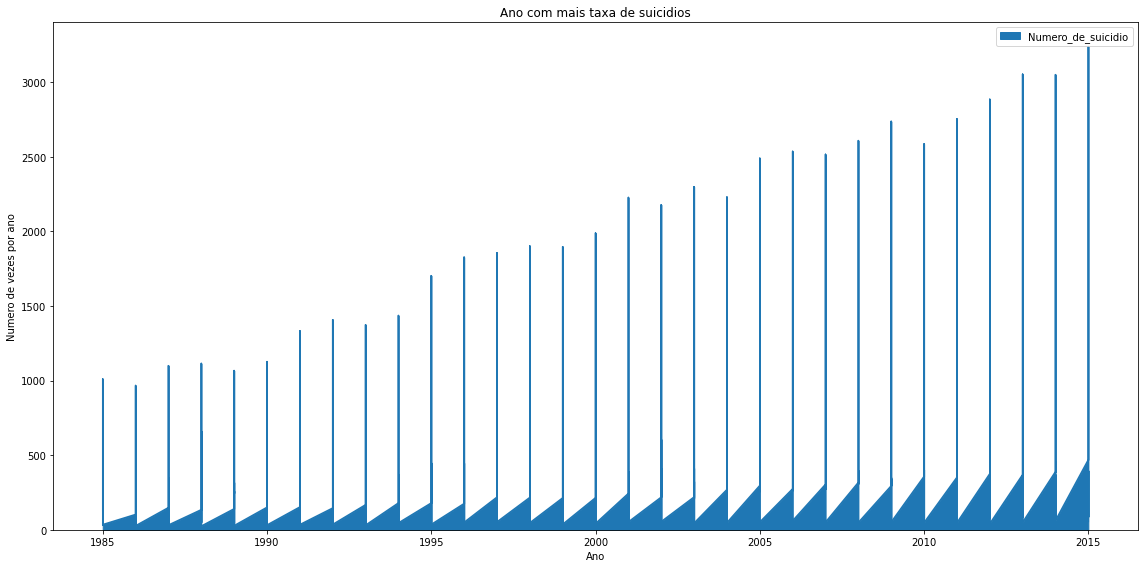

In [21]:
fig,ax=plt.subplots(figsize=(16,8))
dados_Brasil.plot(x="Ano",y="Numero_de_suicidio",kind="area",ax=ax,stacked=True)
ax.set_title("Ano com mais taxa de suicidios")
ax.set_ylabel("Numero de vezes por ano")

plt.tight_layout();

Mesmo visualmente é fácil identificar, podemos ver que o ano que teve maior taixa de suicidio de 1985 até 2015, foi o ano de 2015

## Idade Que Mais Comete Suicidio

In [22]:
dados_Brasil.head()

,Ano,Sexo,Idades,Numero_de_suicidio,Populacao,número-de-suicídios-por-100-mil-habitantes,País-Ano,Índice-de-Desenvolvimento-Humano-(IDH)-para-o-ano,gdp_for_year ($),gdp_per_capita ($),Generation
País,,,,,,,,,,,
Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [23]:
idade_mais_suicidio=pd.pivot_table(dados_Brasil,index="Ano",columns="Idades",values="Numero_de_suicidio")

In [24]:
idade_mais_suicidio.head()

Idades,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
Ano,,,,,,
1985,470.5,530.0,653.5,38.0,341.5,80.5
1986,508.0,505.5,651.0,31.0,372.0,68.0
1987,502.0,565.5,724.5,33.5,422.0,88.5
1988,472.0,557.5,724.0,30.0,356.0,93.5
1989,491.5,569.0,692.5,31.5,354.5,92.5


In [25]:
ordenando_colunas=["5-14 years","15-24 years","25-34 years","35-54 years","55-74 years","75+ years"]

In [26]:
dados_novos_idades_mais_suicidios=idade_mais_suicidio.reindex(ordenando_colunas,axis=1)

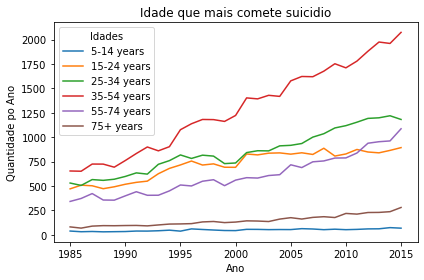

In [27]:
fig,ax=plt.subplots()

dados_novos_idades_mais_suicidios.plot(kind="line",ax=ax)
ax.set_title("Idade que mais comete suicidio")
ax.set_ylabel("Quantidade po Ano")
plt.tight_layout();

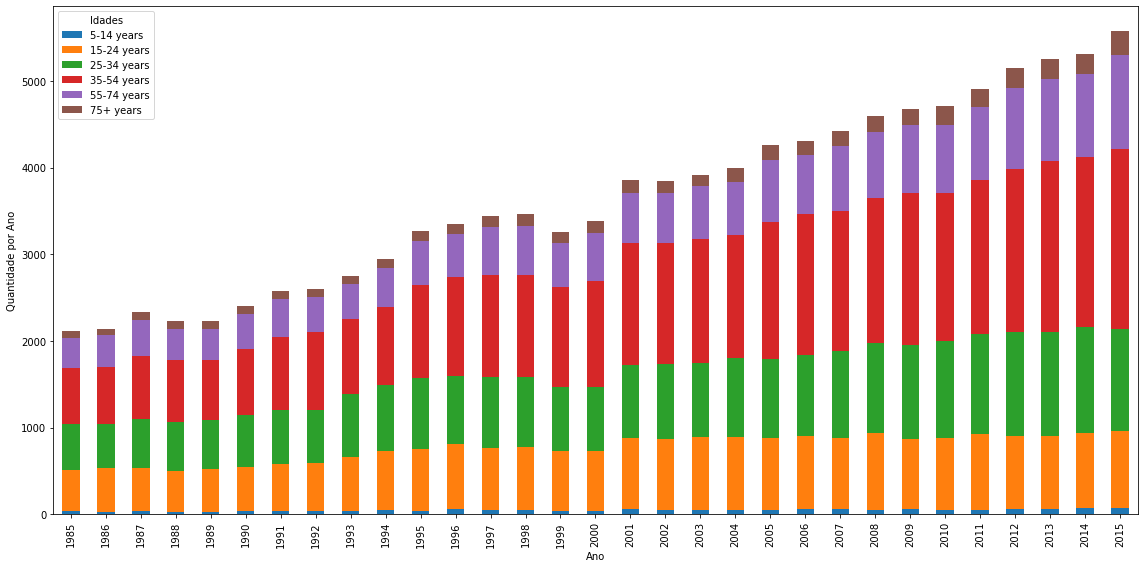

In [28]:
fig,ax=plt.subplots(figsize=(16,8))
ax.set_ylabel("Quantidade por Ano")

dados_novos_idades_mais_suicidios.plot(kind="bar",ax=ax,stacked=True)
plt.tight_layout();

Então análisando os dois graficos podemos ver que as idades que vão dos 35 aos 54 são os mais afetados, o motivo pode ser diversos.



## Sexo que mais comete suicidios

In [29]:
Troca_sexo=dados_Brasil["Sexo"]

In [30]:
Troca_sexo.unique()

array(['male', 'female'], dtype=object)

In [38]:
Troca_sexo.replace(["male","female"],["Masculino","Femenino"],inplace=True)

In [39]:
Troca_sexo

País
Brazil    Masculino
Brazil    Masculino
Brazil    Masculino
Brazil    Masculino
Brazil    Masculino
            ...    
Brazil     Femenino
Brazil     Femenino
Brazil     Femenino
Brazil    Masculino
Brazil     Femenino
Name: Sexo, Length: 372, dtype: object

In [41]:
Troca_sexo.astype("category")

País
Brazil    Masculino
Brazil    Masculino
Brazil    Masculino
Brazil    Masculino
Brazil    Masculino
            ...    
Brazil     Femenino
Brazil     Femenino
Brazil     Femenino
Brazil    Masculino
Brazil     Femenino
Name: Sexo, Length: 372, dtype: category
Categories (2, object): ['Femenino', 'Masculino']

In [42]:
homens_mulheres=dados_Brasil.groupby("Sexo").Numero_de_suicidio.sum()

In [43]:
homens_mulheres

Sexo
Femenino      49015
Masculino    177598
Name: Numero_de_suicidio, dtype: int64

In [44]:
explode=(0.2,0)

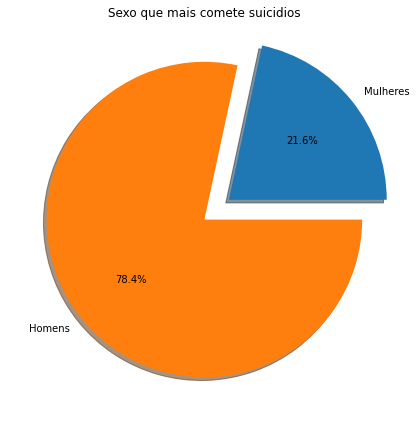

In [45]:
fig,ax=plt.subplots(figsize=(6,6))

ax.pie(homens_mulheres,labels=["Mulheres","Homens"],explode=explode,shadow=True,autopct="%1.1f%%")
ax.set_title("Sexo que mais comete suicidios")

plt.tight_layout();

# Conclusão

O que eu quis trazer neste artigo foi um projeto de análise de dados visando conscientizar a comunidade Python e Data Science sobre a real importância de um problema tão latente nos dias atuais - porém negligenciado ou ignorado por boa parte das pessoas.

O conjunto de dados usado aqui é simplificado, porém ideal para uma abordagem inicial, para se criar uma consciência situacional a respeito do tema.

Há diversas iniciativas dentro do campo da Inteligência Artificial visando não apenas a conscientização, mas também prevenção de suicídios. Uma das mais populares diz respeito à análise de postagens em redes sociais, onde algoritmos de Machine Learning são capazes de identificar potenciais suicidas e alertar outras pessoas.

A campanha é em setembro, mas falar sobre prevenção do suicídio em todos os meses do ano é fundamental -Setembro Amarelo

Ainda são iniciativas muito incipientes, que esbarram em muitas questões de privacidade, porém empresas como o Facebook já tem apostado nesse caminho.

Espero que este artigo tenha trazido um pouco de conhecimento e alertado você sobre um problema tão sério. Sinta-se a vontade para expandir meu notebook e compartilhar o resultado com mais pessoas.

